In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.integrate as intgr

In [3]:
plt.style.use('../include/aps.mplstyle')
mpl.rcParams["figure.figsize"] = [3.4039, 2.10373]

In [4]:
def normalize_psi_PIMC(psi, x):
   int_psi_square = 2*np.pi*25*intgr.simpson(y = x*psi, x = x)
   print(int_psi_square)
   return int_psi_square

In [5]:
f2 = open('../data/pimc/temp-decrease/radial-N-reduce-7ca726e1-0504-4b37-a342-77c44d0978b6.dat','r')
lines = f2.readlines()
x1h = np.array([])
y1h = np.array([])
z1h = np.array([])
for line in lines[3:]:
    p = line.split()
    x1h = np.append(x1h,float(p[0]))
    y1h = np.append(y1h,float(p[1]))
    z1h = np.append(z1h,float(p[2]))
f2.close()
normalize_psi_PIMC(y1h,x1h)

1.974616283525505


np.float64(1.974616283525505)

In [6]:
f2 = open('../data/pimc/temp-decrease/radial-N-reduce-aae54738-4649-463a-88db-ac89832b906d.dat','r')
lines = f2.readlines()
x2 = np.array([])
y2 = np.array([])
z2 = np.array([])
for line in lines[3:]:
    p = line.split()
    x2 = np.append(x2,float(p[0]))
    y2 = np.append(y2,float(p[1]))
    z2 = np.append(z2,float(p[2]))
f2.close()
normalize_psi_PIMC(y2,x2)

1.9759075939366437


np.float64(1.9759075939366437)

In [7]:
f2 = open('../data/pimc/temp-decrease/radial-N-reduce-4cb02885-e62e-43a2-91a3-857124b3016c.dat','r')
lines = f2.readlines()
x1 = np.array([])
y1 = np.array([])
z1 = np.array([])
for line in lines[3:]:
    p = line.split()
    x1 = np.append(x1,float(p[0]))
    y1 = np.append(y1,float(p[1]))
    z1 = np.append(z1,float(p[2]))
f2.close()
normalize_psi_PIMC(y1,x1)

1.9771521900689228


np.float64(1.9771521900689228)

In [13]:
fname = "../data/Relaxation/Radial-wavefunction-CsR8.npz"
with np.load(fname) as f:
   rval = f['arr_0']
   radial = f['arr_1']
norm = normalize_psi_PIMC(radial,rval)

1.9989870399327152


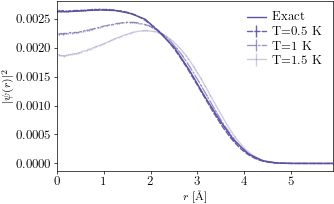

In [15]:
with plt.style.context('aps'):
    figsize = plt.rcParams['figure.figsize']
    fig,ax = plt.subplots(figsize=(figsize[0],figsize[1]), constrained_layout=True)
    ax.plot(rval,radial,label='Exact',color='#5E4FA2',linestyle='solid',alpha=1.0)
    ax.errorbar(x1h,y1h,z1h,label='T=0.5 K',color='#5E4FA2',linestyle='dashed',alpha=0.9)
    ax.errorbar(x2,y2,z2,label='T=1 K',color='#5E4FA2',linestyle='dashdot',alpha=0.6)
    ax.errorbar(x1,y1,z1,label='T=1.5 K',color='#5E4FA2',linestyle='solid',alpha=0.3)
    ax.set_xlabel('$r$ [Å]')
    ax.set_ylabel(r'$|\psi(r)|^2$')
    ax.set_xlim(0,5.9)
    ax.legend(handlelength = 1.5)
    plt.show()
    plt.savefig('../figures/pimc_comparison.pdf')